In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

### Capital Asset Pricing Model - Basics

CAPM is used to estimate the rate of return of an asset. It is a model for pricing an individual security or portfolio. The model takes into account the asset's sensityvity to non-diversifiable risk known as systematic/market risk $\beta$.

Define:
- $R_f$ the risk-free rate of interest (\textit{i.e.} bond yield)
- $R_i$ the excess return of stock $i$ in portfolio
- $R_m$ the excess return of the market portfolio (e.g. S&P 500)
- $\mathbb{E}(R_i)$ the expected return on asset $i$
- $\beta_i = \frac{\text{cov}(R_i, R_m)}{\text{var}(R_m)}$ 

We then have: 
$$\mathbb{E}(R_i) = R_f + \beta_i \times (\mathbb{E}(R_m) - Rf)$$

#### Assumptions:        

- Inverstors are Risk-Adverse individuals, who maximise the expected utility of their end of period wealth.
- Inversotrs are price-takers. They have homogeneous expectations about asset returns, which are assumed to be joint normally distributed.
- There exists a risk-free asset in the market, and investors might lend/borrow an unlimited amount at this rate.
- The quantities of assets are fixed.
- Asset markets are frictionless. ALL information is costless and simultaneously available.
- There are no market imperfections: \textit{e.g.} taxes, regulations, restrictions to short-selling.

CAPM is the theory describing an equilibrium situation in financial markets. It does this by assuming that:
            SUPPLY = DEMAND

#### Equilibrium conditions

As stated above, in equilibrium, SUPPLY = DEMAND, so the market portfolio consists of ALL financial assets in the marketplace, and MUST coincide with the TANGENCY portfolio. 

- Everyone must own the entire market



#### CAPM Derivation

- Let $x_i$ be proportion of asset $i$ in portfolio. Hence, the proportion of risk free asset in portfolio will be:
    $$1 - \sum_i x_i~.$$
- The return of the portfolio will thus be the weighted sum of each of the returns $r_i$ in the portfolio:
$$ r_P = \sum x_i r_i + r_f\left(1-\sum_i x_i\right)~.$$
- Let $\Sigma = {\rm var}(\boldsymbol{r})$ be the covariance matrix. The variance of the portfolio will then be:
$$ {\rm var}(r_p) = \sigma^2_P = \boldsymbol{x}^T \Sigma \,\boldsymbol{x}~.$$
- Finally, the expectation of returns then reads:
$$ \mathbb{E}(r_P) = \sum x_i \mathbb{E}(r_i) + r_f\left(1- \sum_i x_i\right)~.$$

- Investors choose a portfolio to minimise RISK for a given return. We define RISK as the square root of the variance portfolio, that is, RISK is the same as $\sigma_P$. This thus becomes a Lagrangian problem:
$$\min_x \sigma_P + \lambda \left( \mathbb{E}[r_P] - \sum x_i \mathbb{E}(r_i) - r_f\left(1- \sum_i x_i\right) \right)~. $$
- That is, we want to choose the portfolio $(x_i)$ such that the risk is minimised, subject to the constraint that the portfolio return is given by the above expression.
- Taking partial derivatives wrt $x$ and $\lambda$, one gets the following two equations:
$$\begin{aligned}
x\,: \qquad & \sigma_P - \lambda\left( \sum x_i \mathbb{E}(r_i) - r_f \sum x_i \right) = 0~, \\
\lambda\,: \qquad &  \mathbb{E}(r_P) - \sum x_i \mathbb{E}(r_i) - r_f\left(1- \sum_i x_i\right) = 0~.
\end{aligned}$$

#### Market Portfolio

- The market portfolio is the portfolio for which the risk-free asset has 0 proportion. That is:
    $$\sum_i x_i = 1~, $$
leading thus to:
$$ \mathbb{E}(r_m) = \sum x_i \mathbb{E}(r_i)~, \qquad \sigma_m = \left( \sum x_i \mathbb{E}(r_i) - r_f \right)$$
    

### Taks 1: Computing $\beta_i$

We will use the S&P 500 as the benchmark. Note:
- $\beta = 0$: stock uncorrelated to market
- $\beta = 1$: stock perfectly correlated to market, same volatility
- $\beta>1$: stock more volatile than the market
- $\beta<1$: stock less volatile than the marker

In [2]:
sp_df = pd.read_csv('GSPC.csv')
jpm_df = pd.read_csv('JPM.csv')

sp_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,09/04/2018,4081.15,4107.32,4069.84,4105.02,4105.02,3486690000
1,10/04/2018,4094.50,4099.69,4072.56,4090.38,4090.38,3968020000
2,11/04/2018,4128.03,4133.13,4086.87,4100.60,4100.60,4227800000
3,12/04/2018,4102.20,4127.66,4098.79,4124.51,4124.51,4234700000
4,13/04/2018,4056.18,4110.75,4056.18,4109.31,4109.31,4525120000


In [3]:
jpm_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,06/04/2023,127.000000,128.080002,126.860001,127.470001,127.470001,8752500
1,05/04/2023,126.800003,128.149994,126.459999,127.610001,127.610001,9614700
2,04/04/2023,130.500000,130.589996,127.410004,128.419998,127.419998,11579900
3,03/04/2023,129.910004,131.440002,129.410004,130.160004,129.146454,11775400
4,31/03/2023,129.660004,130.339996,128.850006,130.309998,129.295288,13101300


In [4]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [5]:
jpm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


- Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions.
- For the CAPM formula, we need the Returns. We can calculate this from the percentage change of the Adjusted Close value. We will essentially look at: 

        new_close/old_close - 1

In [6]:
sp_df['Returns'] = sp_df['Adj Close'].pct_change()
jpm_df['Returns'] = jpm_df['Adj Close'].pct_change()

jpm_df['Returns']

0            NaN
1       0.001098
2      -0.001489
3       0.013549
4       0.001152
          ...   
1254    0.000817
1255    0.027833
1256   -0.024257
1257    0.017085
1258   -0.018754
Name: Returns, Length: 1259, dtype: float64

- Clearly, there is no percentage change for the first entry, so we remove it. We store these values in some numpy arrays.

In [7]:
sp_returns = sp_df['Returns'].values[1:]
jpm_returns = jpm_df['Returns'].values[1:] # to make same length

jpm_returns.size

1258

- Now, we use the sns.regplot method to make a scatter plot of this returns. The $\beta$ is the slope of the line!
- The translucent band lines in the regplot describe a bootstrap confidence interval generated for the estimate.

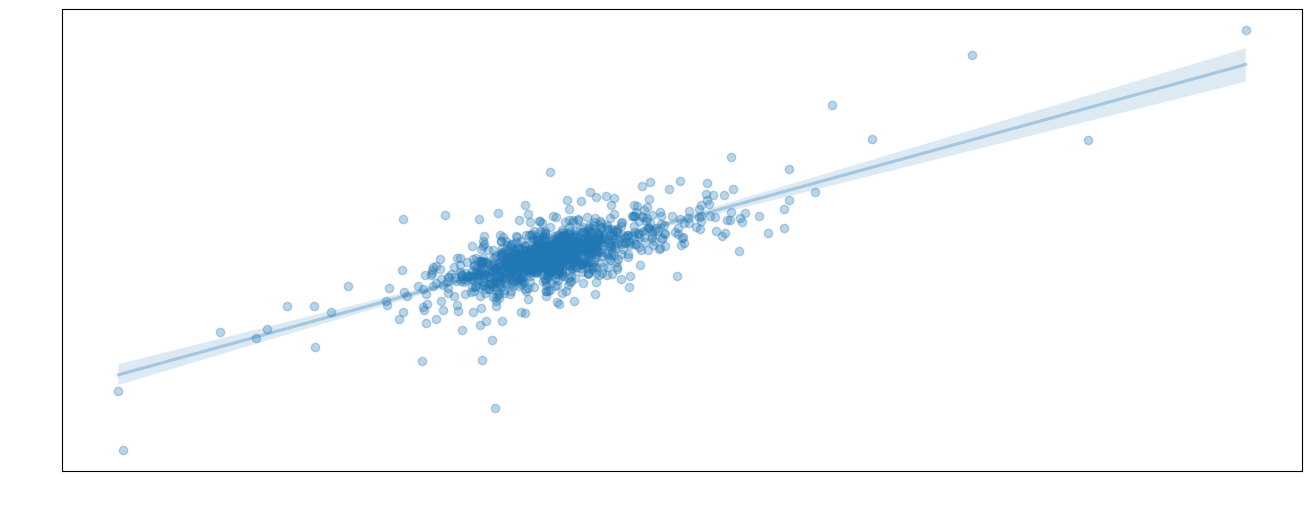

In [89]:
plt.figure(figsize=(16,6))
ax = sns.regplot(x=sp_returns, y=jpm_returns, ci=95, scatter_kws = {'alpha': 0.3}, line_kws = {'color':y'alpha': 0.3})

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.show()

- To obtain this slope, we use stats.linregress() function from scipy.

In [8]:
res = stats.linregress(sp_returns, jpm_returns)
res

LinregressResult(slope=1.094133276611552, intercept=0.0002600233737859146, rvalue=0.7461796419668509, pvalue=3.578452710460531e-224, stderr=0.02754480470483958, intercept_stderr=0.0003801478983596327)

- We are using the market as the independent variable, because we are asking how risky is a given stock relative to the market. The actual $\beta$ of JPM, according to Yahoo Finance is $1.10$, which is extremely close to our value! 
- Question: Is a linear regressor a good model here?

In [77]:
# Two-sided inverse Students t-distribution
# p - probability, df - degrees of freedom
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df))

ts = tinv(0.05, len(sp_returns)-2)
ci = ts*res.stderr
print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
print(f"intercept (95%): {res.intercept:.6f}"
      f" +/- {ts*res.intercept_stderr:.6f}")


slope (95%): 1.094133 +/- 0.054039
intercept (95%): 0.000260 +/- 0.000746


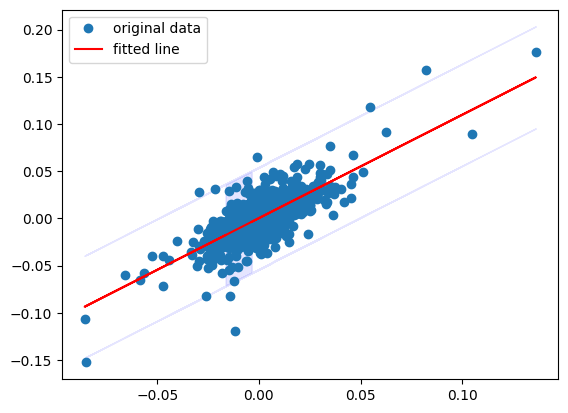

In [81]:
y = res.intercept + res.slope*sp_returns

plt.plot(sp_returns, jpm_returns, 'o', label='original data')
plt.plot(sp_returns, y, 'r', label='fitted line')
plt.fill_between(sp_returns, (y-ci), (y+ci), color='b', alpha=.1)
# ci = 1.96 * np.std(y)/np.sqrt(len(x))

plt.legend()
plt.show()

### Stock Value Plots

In [50]:
sp_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
0,09/04/2018,4081.15,4107.32,4069.84,4105.02,4105.02,3486690000,NaN
1,10/04/2018,4094.50,4099.69,4072.56,4090.38,4090.38,3968020000,-0.003566
2,11/04/2018,4128.03,4133.13,4086.87,4100.60,4100.60,4227800000,0.002499
3,12/04/2018,4102.20,4127.66,4098.79,4124.51,4124.51,4234700000,0.005831
4,13/04/2018,4056.18,4110.75,4056.18,4109.31,4109.31,4525120000,-0.003685


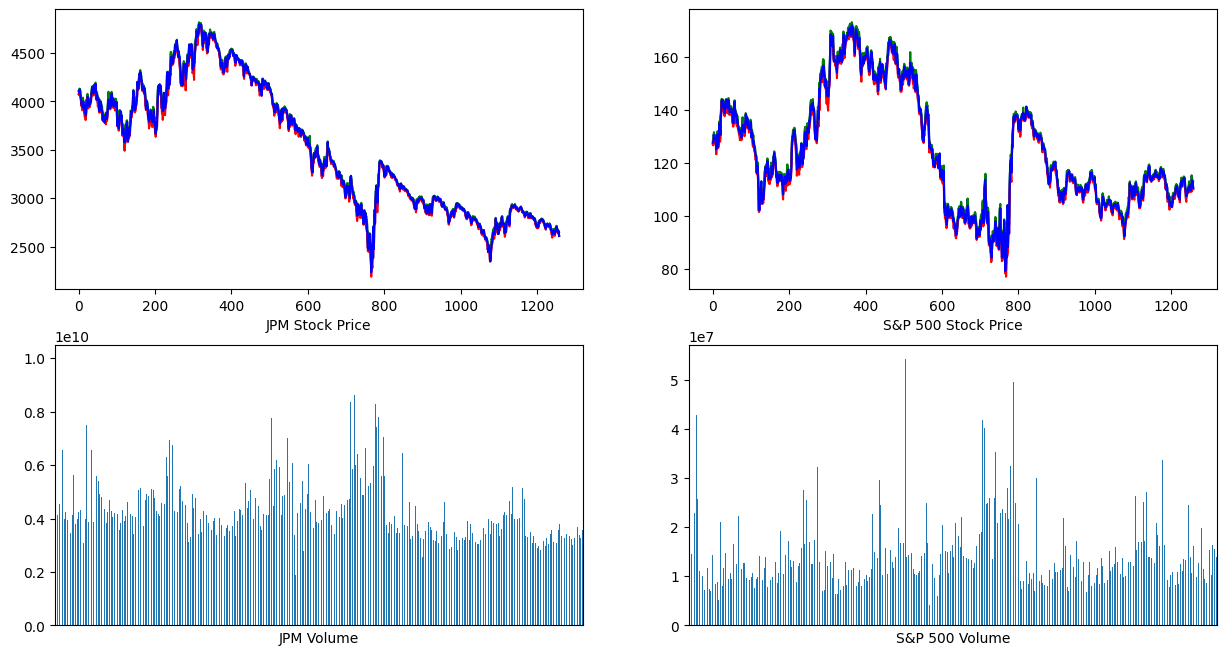

In [71]:
fig, axes = plt.subplots(2,2, figsize=(15,8))
sp_df.Open.plot(ax=axes[0][0], style='b-')
sp_df.High.plot(ax=axes[0][0], style='g-')
sp_df.Low.plot(ax=axes[0][0], style='r-')
sp_df.Close.plot(ax=axes[0][0], style='b-')
axes[0][0].set_xlabel('JPM Stock Price')

sp_df.Volume.plot.bar(ax=axes[1][0])
axes[1][0].set_xlabel('JPM Volume')

axes[1][0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

jpm_df.Open.plot(ax=axes[0][1], style='b-')
jpm_df.High.plot(ax=axes[0][1], style='g-')
jpm_df.Low.plot(ax=axes[0][1], style='r-')
jpm_df.Close.plot(ax=axes[0][1], style='b-')
axes[0][1].set_xlabel('S&P 500 Stock Price')

jpm_df.Volume.plot.bar(ax=axes[1][1])
axes[1][1].set_xlabel('S&P 500 Volume')
axes[1][1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off


### CAPM assumptions: Normally distributed returns

In [14]:
import pingouin as pg

(-3.5, 6.0)

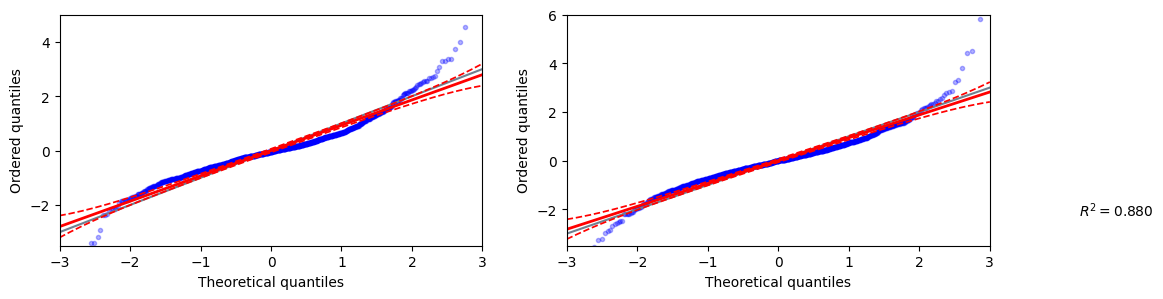

In [45]:
fig, axes = plt.subplots(1,2, figsize=(12,3))
pg.qqplot(sp_returns, dist='norm', confidence=.95, marker=".", ax=axes[0], square=False, alpha=0.3)
pg.qqplot(jpm_returns, dist='norm', confidence=.95, marker=".", ax=axes[1], square=False, alpha=0.3)

axes[0].set_xlim([-3, 3])
axes[0].set_ylim([-3.5, 5])

axes[1].set_xlim([-3, 3])
axes[1].set_ylim([-3.5, 6])

 - CAPM assumes that risk can be measured by a stock’s price volatility. However, price movements in both directions ARE NOT equally risky. The look-back period to determine a stock’s volatility is not standard because stock returns (and risk) are NOT normally distributed, as we can see in above plots!

- We have seen that daily returns are not normally distributed. Let's look instead at monthly returns.

In [13]:
import pandas_datareader.data as reader
import datetime as dt
import statsmodels.api as sm

### Working with Monthly Returns instead

In [11]:
sp_df['Returns'] = sp_df['Adj Close'].pct_change()
jpm_df['Returns'] = jpm_df['Adj Close'].pct_change()

jpm_df['Returns']

In [9]:
df1 = pd.concat([jpm_df['Date'] ,sp_df['Adj Close'], jpm_df['Adj Close']], axis=1, keys=['Date','sp', 'jpm'])
df1.Date = pd.to_datetime(df1.Date, format='%d/%m/%Y') # convert 'date' to actual date
df1 = df1.set_index('Date')

df1.head()

,sp,jpm
Date,,
2023-04-06,4105.02,127.470001
2023-04-05,4090.38,127.610001
2023-04-04,4100.60,127.419998
2023-04-03,4124.51,129.146454
2023-03-31,4109.31,129.295288


In [10]:
monthly_return = df1.resample('M').ffill().pct_change()
monthly_return = monthly_return.dropna(axis=0)
monthly_return.head()

,sp,jpm
Date,,
2018-05-31,0.021608,-0.016271
2018-06-30,0.004842,-0.026259
2018-07-31,0.036022,0.109162
2018-08-31,0.030263,-0.003219
2018-09-30,0.004294,-0.015186


In [11]:
monthly_return.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2018-05-31 to 2023-04-30
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sp      60 non-null     float64
 1   jpm     60 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


In [14]:
X = monthly_return['sp'] # independent variable
Y = monthly_return['jpm'] # dependent variable

# When using statsmodel, you should add an intercept
X_sm = sm.add_constant(X)

In [15]:
model = sm.OLS(Y, X_sm)

In [16]:
results = model.fit()

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    jpm   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     68.23
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           2.25e-11
Time:                        11:22:38   Log-Likelihood:                 89.769
No. Observations:                  60   AIC:                            -175.5
Df Residuals:                      58   BIC:                            -171.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.007     -0.181      0.857      -0.016       0.013
sp             1.1023      0.133      8.260      0.000       0.835       1.369
==============================================================================
Omnibus:                        1.789   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.409   Jarque-Bera (JB):                1.698
Skew:                           0.394   Prob(JB):                        0.428
Kurtosis:                       2.761   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From the monthly returns, we now get the value $\beta = 1.1023$, which is closer to what yahoo finance gives

In [20]:
fig, axes = plt.subplots(1,2, figsize=(12,3))
sns.regplot(x=sp_returns, y=jpm_returns, ax=axes[0], ci=95, scatter_kws = {'alpha': 0.3}, line_kws = {'color':y'alpha': 0.3})

sns.regplot(x='sp', y='jpm', data=monthly_return, ax=axes[1] = )
plt.show()

SyntaxError: invalid syntax (3182434982.py, line 2)

### CAPM assumptions: Normally distributed data (monthly returns)

- Now, if we look at the monthly returns, these are much better! (in terms of being normally distributed)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

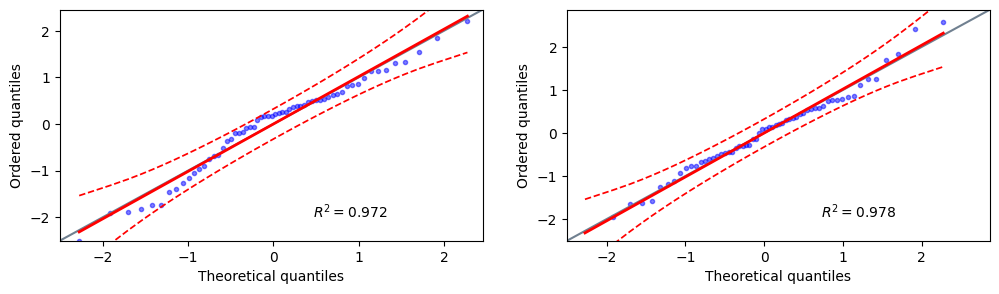

In [99]:
fig, axes = plt.subplots(1,2, figsize=(12,3))
pg.qqplot(monthly_return['sp'], dist='norm', confidence=.95, marker=".", ax=axes[0], square=False, alpha=0.5)
pg.qqplot(monthly_return['jpm'], dist='norm', confidence=.95, marker=".", ax=axes[1], square=False, alpha=0.5)

### Including the risk free rate in monthly returns

- That is, what we calculated before was the $\beta$ for a model without a risk-free rate. Instead, when adding it, we have:
$$R_i - R_f = \alpha + \beta_i(R_m - R_f) + \epsilon_i~. $$

In [90]:
end = dt.date(2023, 4, 6)
start = dt.date(2018, 4, 9)
rf = reader.DataReader('F-F_Research_Data_Factors','famafrench', start, end)[0].RF
rf = rf[1:]

In [94]:
jpm_rf_return = monthly_return['jpm'][:-2]-rf.values
sp_rf_return =  monthly_return['sp'][:-2]-rf.values

In [95]:
X = sp_rf_return # independent variable
Y = jpm_rf_return # dependent variable

# When using statsmodel, you should add an intercept
X_sm = sm.add_constant(X)
model = sm.OLS(Y, X_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    jpm   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     269.9
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           4.45e-23
Time:                        21:39:12   Log-Likelihood:                 88.563
No. Observations:                  58   AIC:                            -173.1
Df Residuals:                      56   BIC:                            -169.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.009     -0.240      0.811      -0.020       0.016
sp             0.9568      0.058     16.428      0.000       0.840       1.073
==============================================================================
Omnibus:                        4.525   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                4.238
Skew:                           0.660   Prob(JB):                        0.120
Kurtosis:                       2.899   Cond. No.                         8.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
df2 = pd.concat([sp_rf_return, jpm_rf_return], axis=1, keys=['sp-rf', 'jpm-rf'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58 entries, 2018-05-31 to 2023-02-28
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sp-rf   58 non-null     float64
 1   jpm-rf  58 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


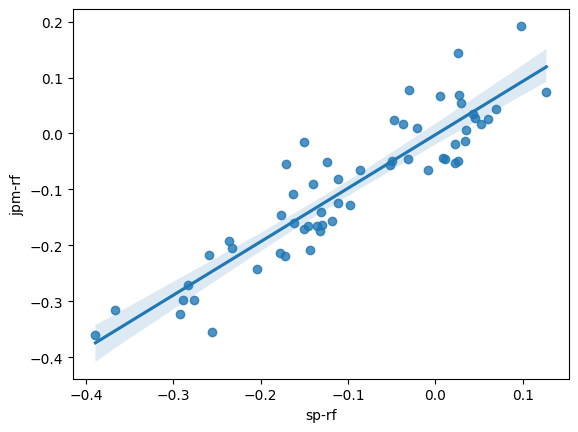

In [98]:
sns.regplot(x='sp-rf', y='jpm-rf', data=df2)
plt.show()

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

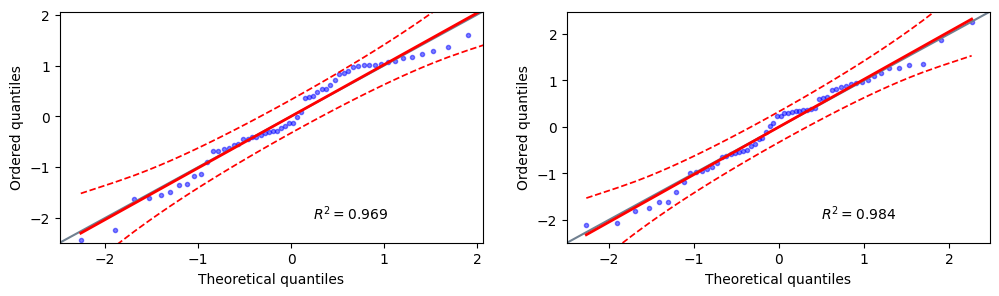

In [100]:
fig, axes = plt.subplots(1,2, figsize=(12,3))
pg.qqplot(df2['sp-rf'], dist='norm', confidence=.95, marker=".", ax=axes[0], square=False, alpha=0.5)
pg.qqplot(df2['jpm-rf'], dist='norm', confidence=.95, marker=".", ax=axes[1], square=False, alpha=0.5)

### GME vs S&P500

In [2]:
sp_df = pd.read_csv('GSPC.csv')
jpm_df = pd.read_csv('JPM.csv')
gme_df = pd.read_csv('GME.csv')

sp_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,09/04/2018,4081.15,4107.32,4069.84,4105.02,4105.02,3486690000
1,10/04/2018,4094.50,4099.69,4072.56,4090.38,4090.38,3968020000
2,11/04/2018,4128.03,4133.13,4086.87,4100.60,4100.60,4227800000
3,12/04/2018,4102.20,4127.66,4098.79,4124.51,4124.51,4234700000
4,13/04/2018,4056.18,4110.75,4056.18,4109.31,4109.31,4525120000


In [3]:
sp_df['Returns'] = sp_df['Adj Close'].pct_change()
jpm_df['Returns'] = jpm_df['Adj Close'].pct_change()
gme_df['Returns'] = gme_df['Adj Close'].pct_change()

jpm_df['Returns']

0            NaN
1       0.001098
2      -0.001489
3       0.013549
4       0.001152
          ...   
1254    0.000817
1255    0.027833
1256   -0.024257
1257    0.017085
1258   -0.018754
Name: Returns, Length: 1259, dtype: float64

In [4]:
sp_returns = sp_df['Returns'].values[1:]
jpm_returns = jpm_df['Returns'].values[1:]
gme_returns = gme_df['Returns'].values[1:]# to make same length

jpm_returns.size

1258

- First, look at JPM vs S&P500 DAILY RETURNS

In [56]:
X1, Y1 = sp_returns, jpm_returns
X1_c = sm.add_constant(X1)
result = sm.OLS(Y1, X1_c).fit()

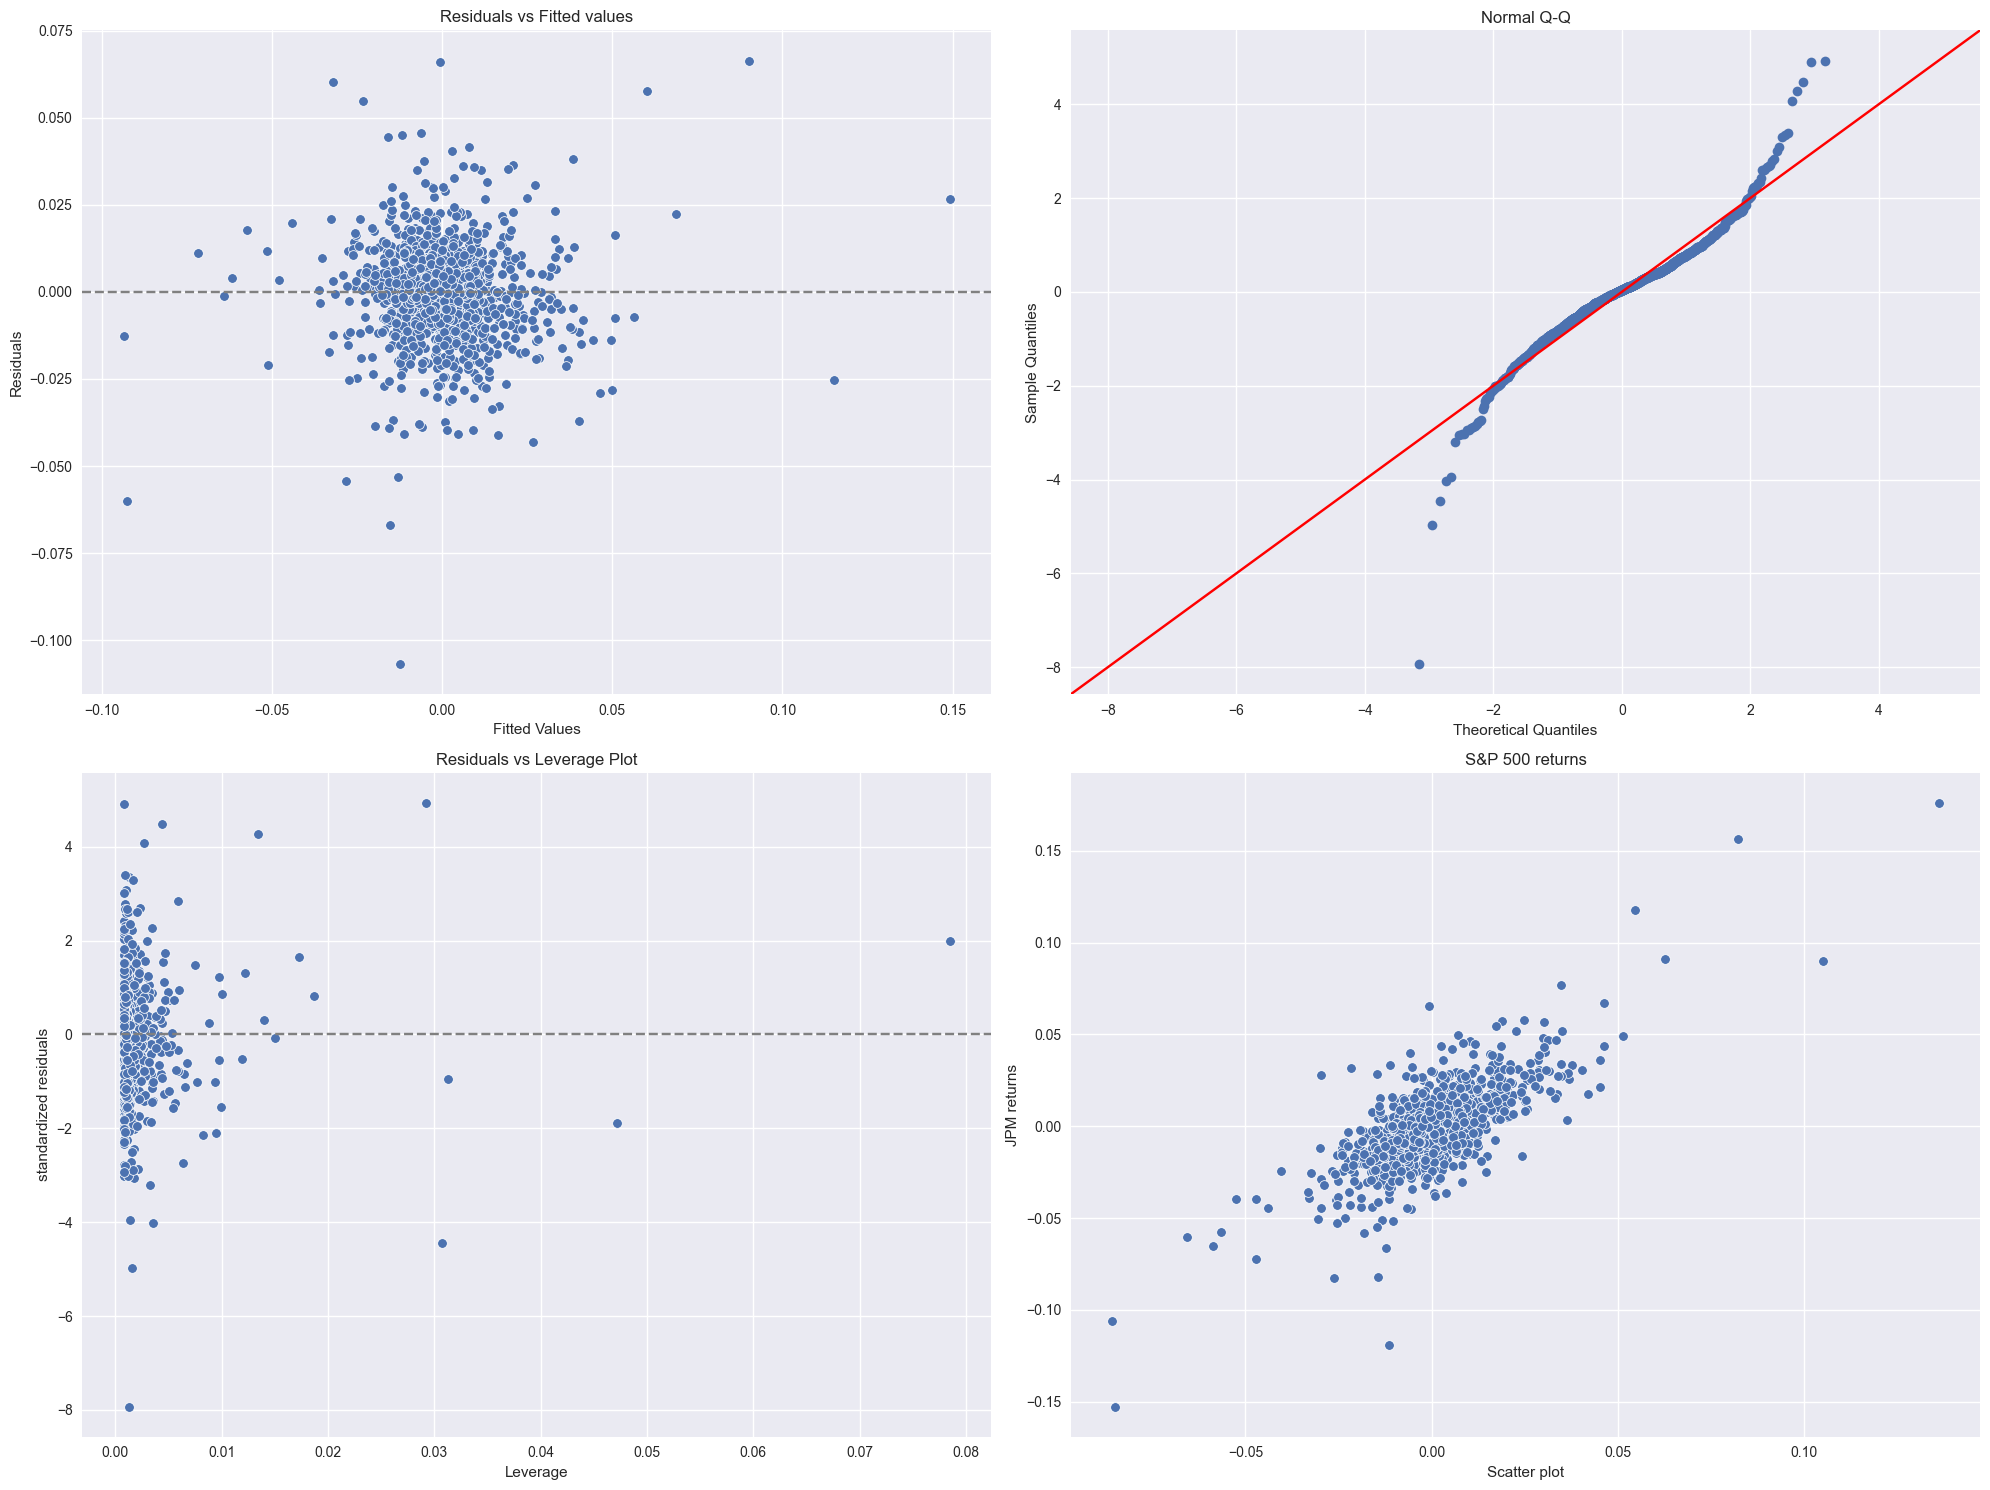

In [57]:
# Get different Variables for diagnostic
residuals = result.resid
fitted_value = result.fittedvalues
stand_resids = result.resid_pearson
influence = result.get_influence()
leverage = influence.hat_matrix_diag
  
# PLot different diagnostic plots
#plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))  
plt.style.use('seaborn')
  
# Residual vs Fitted Plot
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[0, 0])
ax[0, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[0, 0].set_xlabel('Fitted Values')
ax[0, 0].set_ylabel('Residuals')
ax[0, 0].set_title('Residuals vs Fitted values')
  
# Normal Q-Q plot
sm.qqplot(residuals, fit=True, line='45',ax=ax[0, 1], c='#4C72B0')
ax[0, 1].set_title('Normal Q-Q')
  
 
# Residual vs Leverage Plot
sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1, 0])
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 0].set_xlabel('Leverage')
ax[1, 0].set_ylabel('standardized residuals')
ax[1, 0].set_title('Residuals vs Leverage Plot')

# Scatter plot
sns.scatterplot(x=X1, y=Y1, ax=ax[1, 1])
ax[1, 1].set_xlabel('Scatter plot')
ax[1, 1].set_ylabel('JPM returns')
ax[1, 1].set_title('S&P 500 returns')
  

plt.tight_layout()
plt.show()

- Next up, compare GME vs S&P500 DAILY RETURNS

In [58]:
X2, Y2 = sp_returns, gme_returns
X2_c = sm.add_constant(X2)
result = sm.OLS(Y2, X2_c).fit()

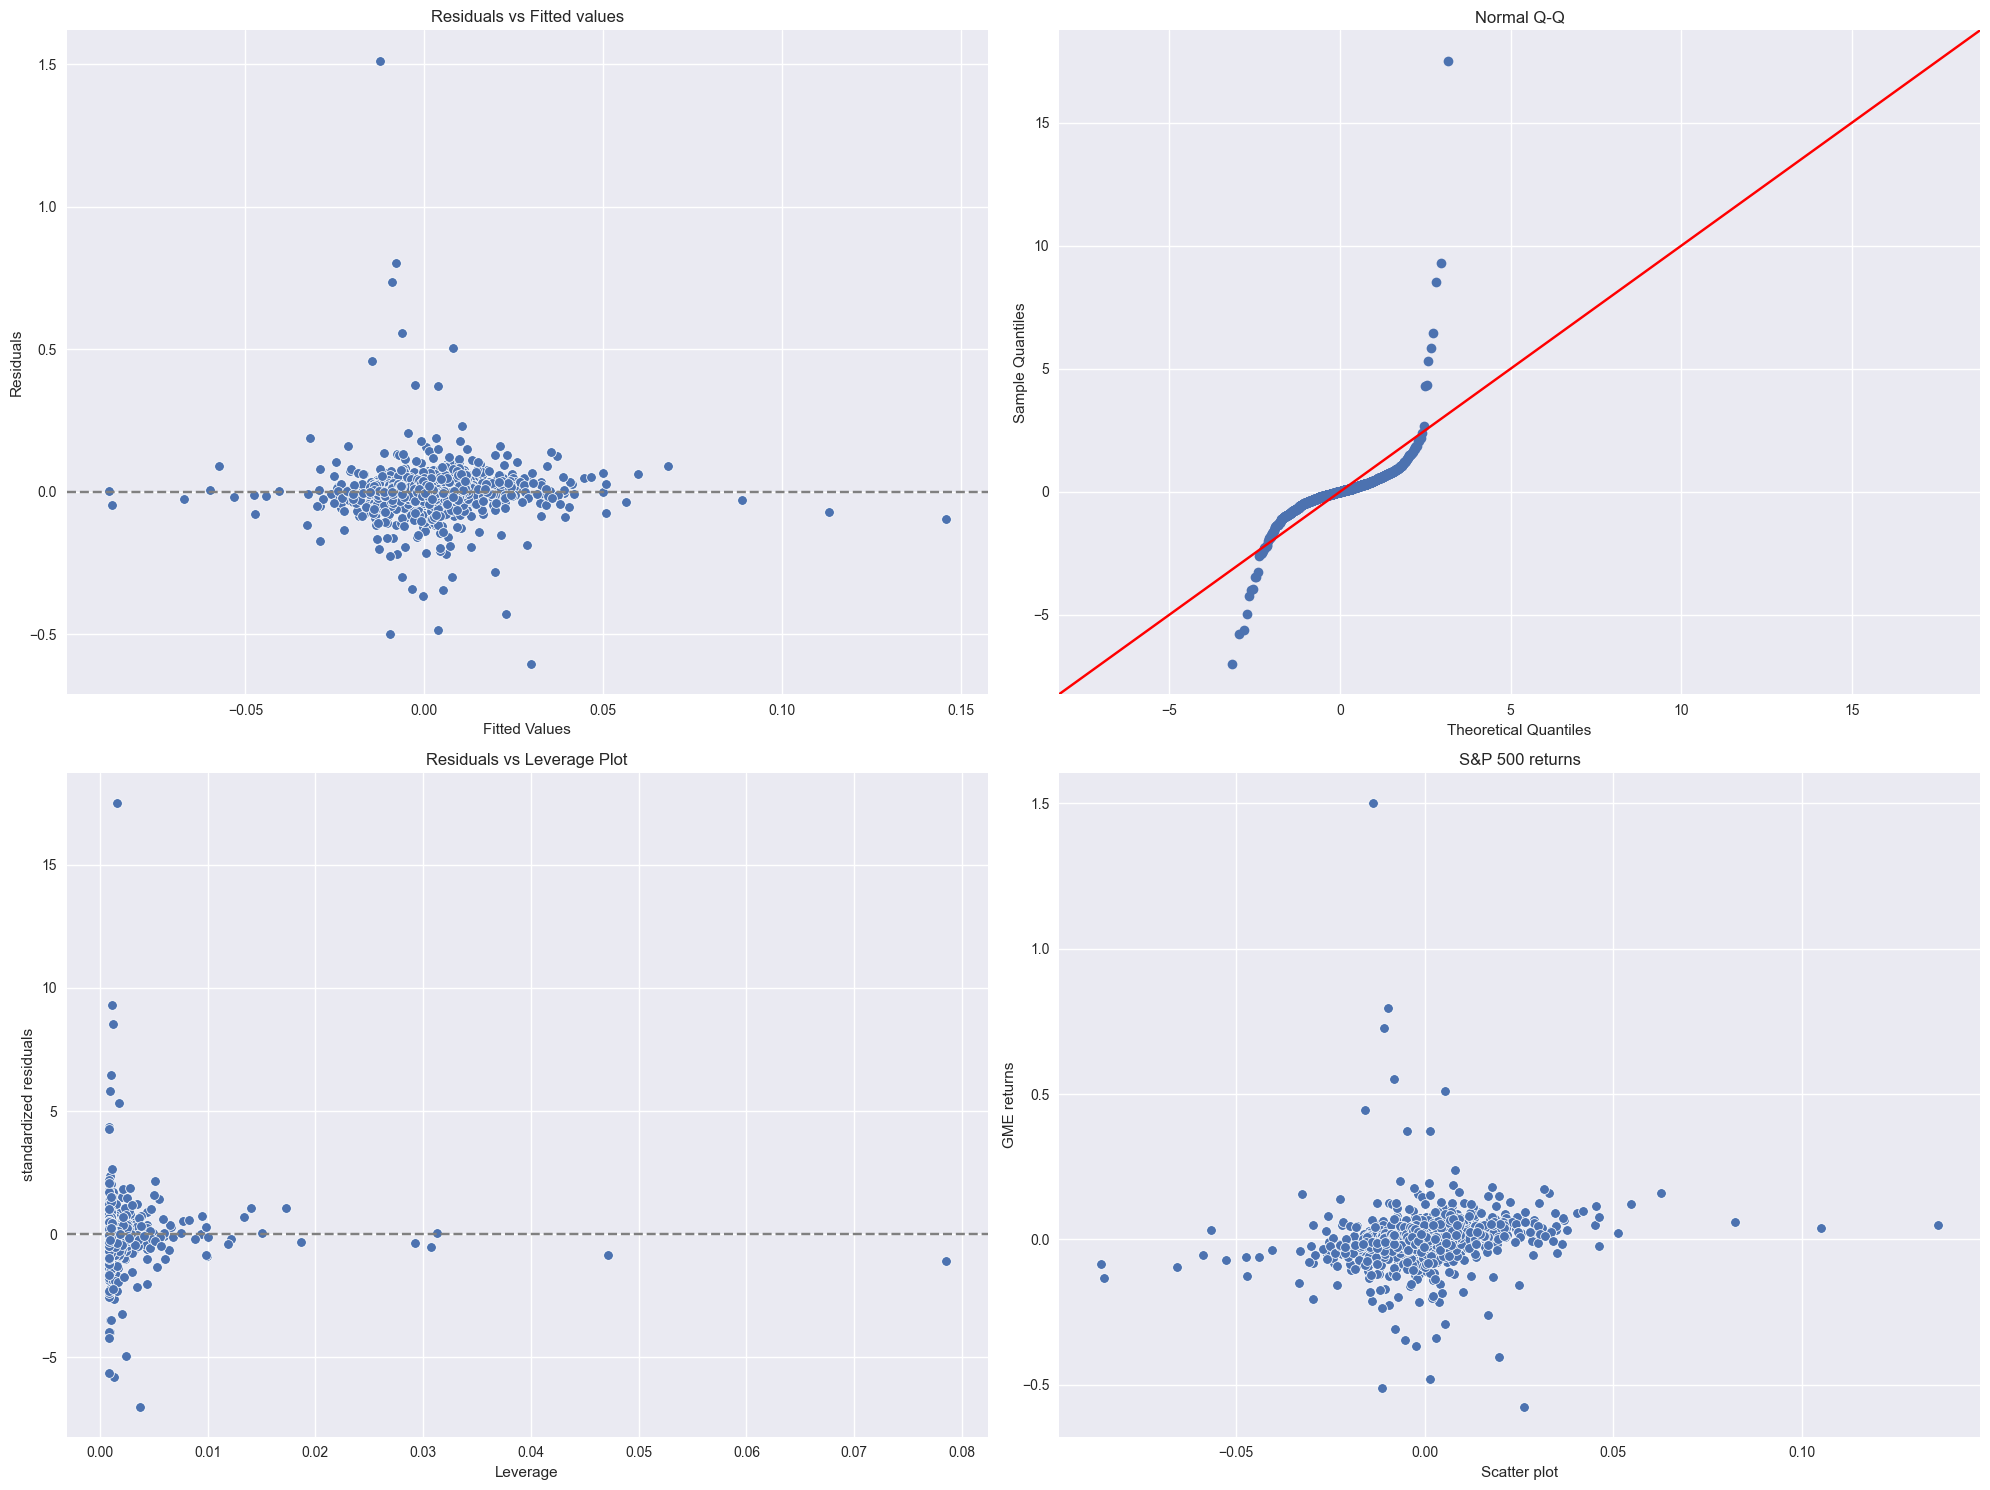

In [59]:
# Get different Variables for diagnostic
residuals = result.resid
fitted_value = result.fittedvalues
stand_resids = result.resid_pearson
influence = result.get_influence()
leverage = influence.hat_matrix_diag
  
# PLot different diagnostic plots
#plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))  
plt.style.use('seaborn')
  
# Residual vs Fitted Plot
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[0, 0])
ax[0, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[0, 0].set_xlabel('Fitted Values')
ax[0, 0].set_ylabel('Residuals')
ax[0, 0].set_title('Residuals vs Fitted values')
  
# Normal Q-Q plot
sm.qqplot(residuals, fit=True, line='45',ax=ax[0, 1], c='#4C72B0')
ax[0, 1].set_title('Normal Q-Q')
  
 
# Residual vs Leverage Plot
sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1, 0])
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 0].set_xlabel('Leverage')
ax[1, 0].set_ylabel('standardized residuals')
ax[1, 0].set_title('Residuals vs Leverage Plot')

# Scatter plot
sns.scatterplot(x=X2, y=Y2, ax=ax[1, 1])
ax[1, 1].set_xlabel('Scatter plot')
ax[1, 1].set_ylabel('GME returns')
ax[1, 1].set_title('S&P 500 returns')
  

plt.tight_layout()
plt.show()

In [72]:
print(np.count_nonzero(stand_resids >= 3))
np.where(stand_resids >= 3)

8


(array([ 459,  513,  546,  548,  549,  551,  967, 1055], dtype=int64),)

In [73]:
[gme_df.iloc[j]['Date'] for j in [ 459,  513,  546,  548,  549,  551,  967, 1055]]

['10/06/2021',
 '24/03/2021',
 '04/02/2021',
 '02/02/2021',
 '01/02/2021',
 '28/01/2021',
 '05/06/2019',
 '29/01/2019']

Conclusions so far:

- Neither relationship is `perfectly' linear, but the JPM vs market is much closer.
- The standardized residuals show clear outliers for the GME - typically, values of 3-4 are considered outliers, but here we even have 17ish!!!
- These large outliers are at the end of January 2021, beginning of February 2021.
- What happens if we look instead at monthly returns??

In [16]:
df1 = pd.concat([jpm_df['Date'] ,sp_df['Adj Close'], jpm_df['Adj Close'], gme_df['Adj Close']], axis=1, keys=['Date','sp', 'jpm', 'gme'])
df1.Date = pd.to_datetime(df1.Date, format='%d/%m/%Y') # convert 'date' to actual date
df1 = df1.set_index('Date')

df1.head()

,sp,jpm,gme
Date,,,
2023-04-06,4105.02,127.470001,22.40
2023-04-05,4090.38,127.610001,22.07
2023-04-04,4100.60,127.419998,22.35
2023-04-03,4124.51,129.146454,23.17
2023-03-31,4109.31,129.295288,23.02


In [17]:
monthly_return = df1.resample('M').ffill().pct_change()
monthly_return = monthly_return.dropna(axis=0)
monthly_return.head()

,sp,jpm,gme
Date,,,
2018-05-31,0.021608,-0.016271,-0.032967
2018-06-30,0.004842,-0.026259,0.133430
2018-07-31,0.036022,0.109162,-0.010981
2018-08-31,0.030263,-0.003219,-0.079112
2018-09-30,0.004294,-0.015186,0.177363


In [47]:
X1 = monthly_return['sp'][:-2] # independent variable
Y1 = monthly_return['jpm'][:-2] # dependent variable

# When using statsmodel, you should add an intercept
X1_c = sm.add_constant(X1)
result = sm.OLS(Y1, X1_c).fit()

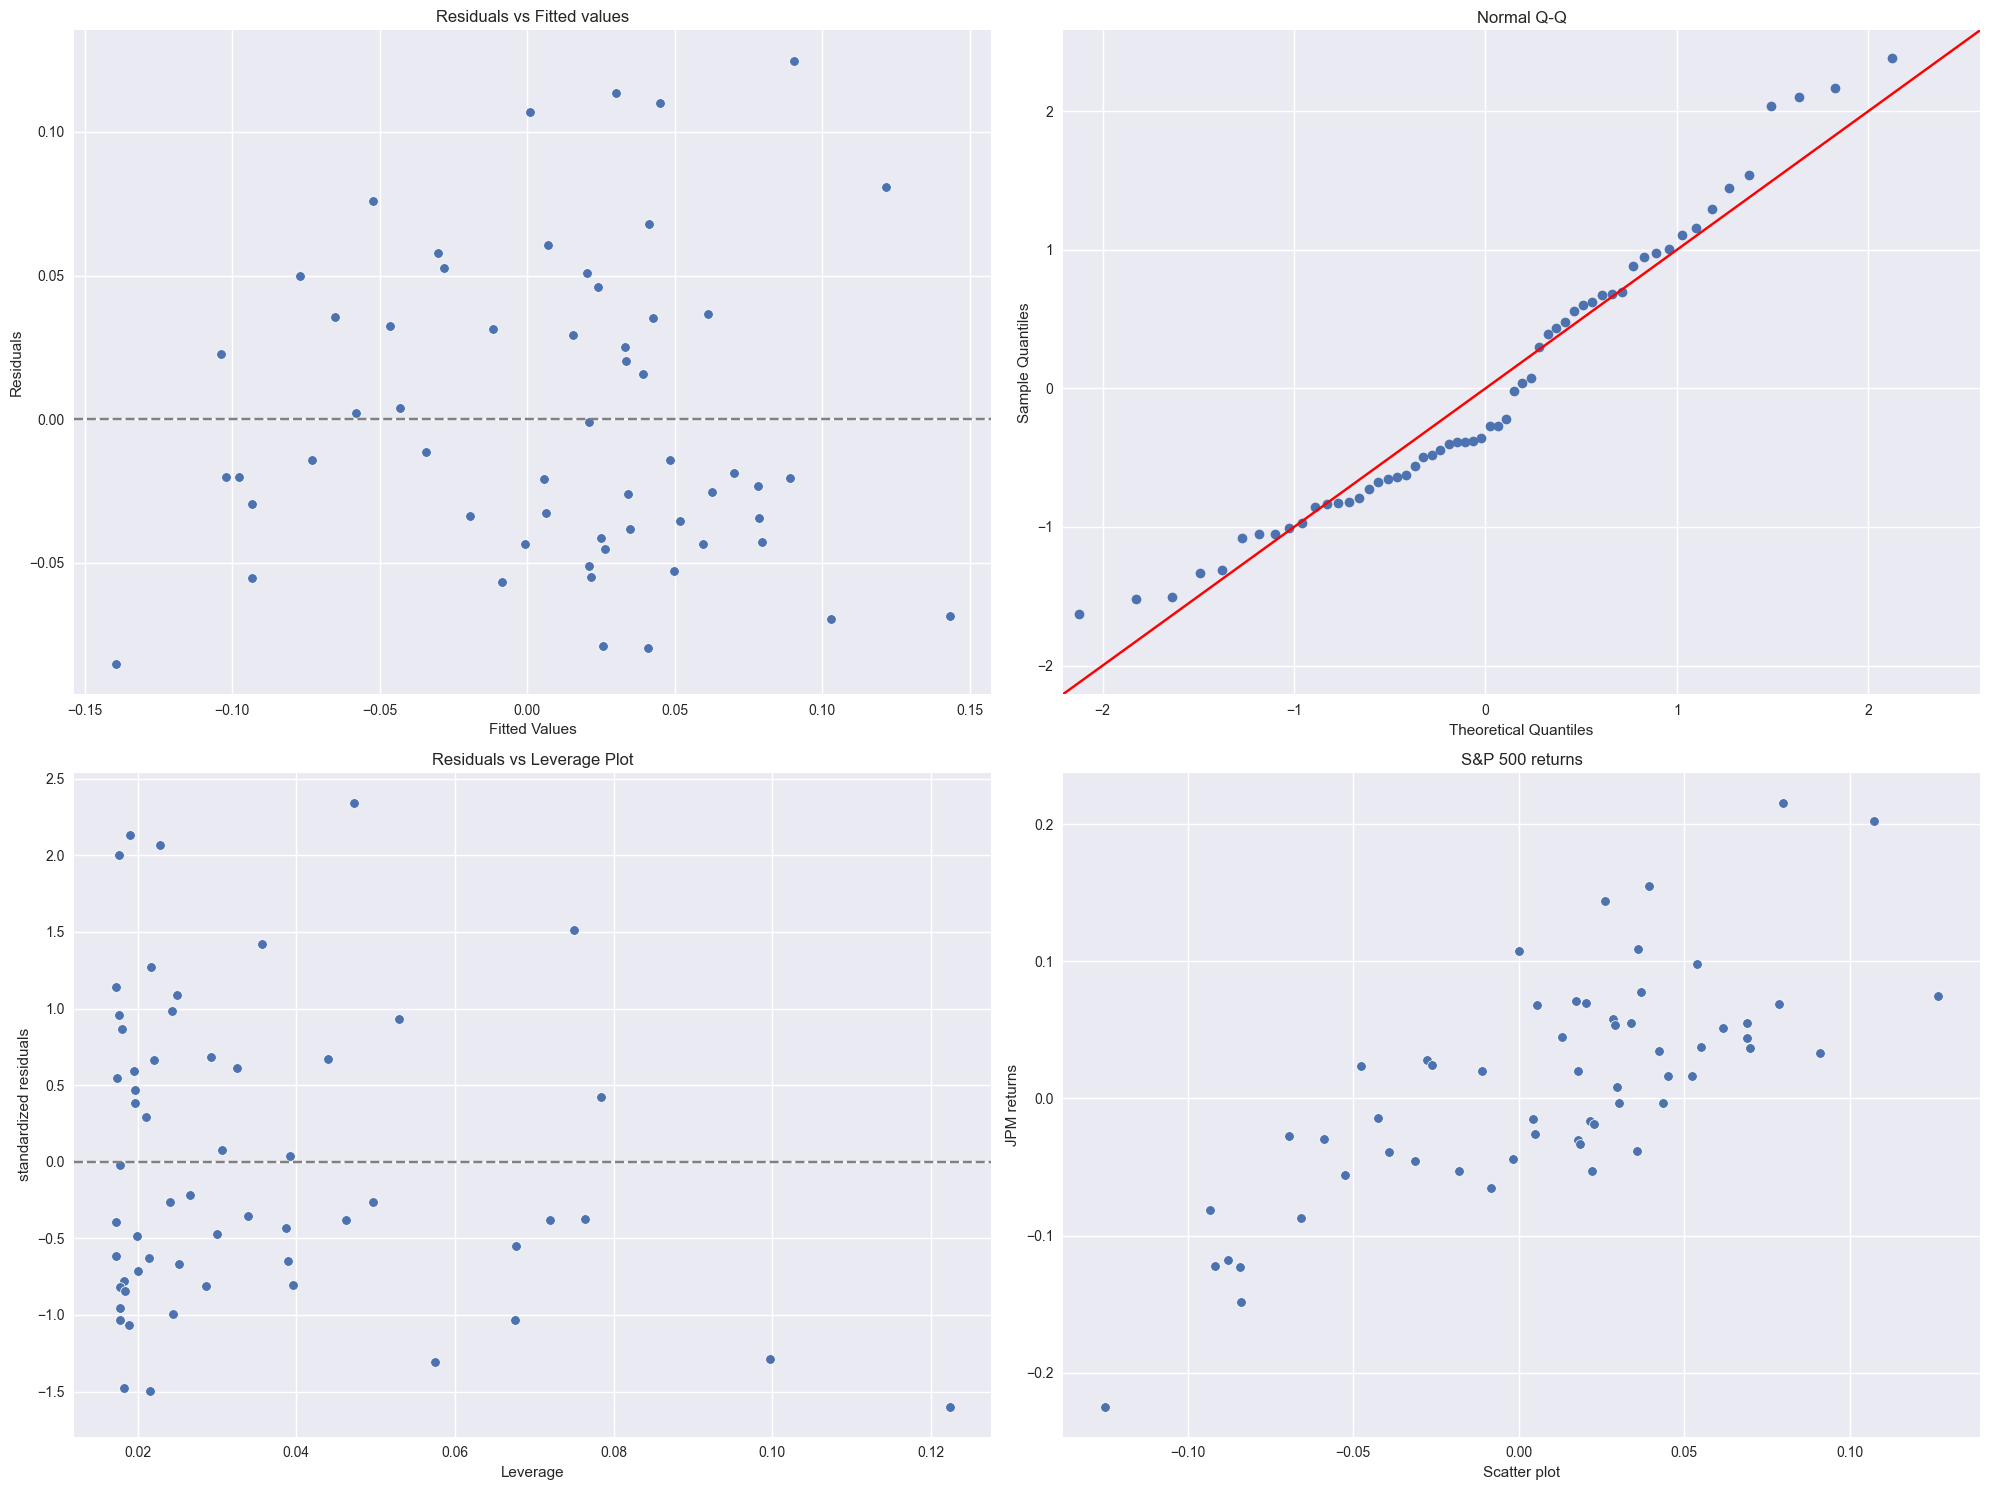

In [48]:
# Get different Variables for diagnostic
residuals = result.resid
fitted_value = result.fittedvalues
stand_resids = result.resid_pearson
influence = result.get_influence()
leverage = influence.hat_matrix_diag
  
# PLot different diagnostic plots
#plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))  
plt.style.use('seaborn')
  
# Residual vs Fitted Plot
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[0, 0])
ax[0, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[0, 0].set_xlabel('Fitted Values')
ax[0, 0].set_ylabel('Residuals')
ax[0, 0].set_title('Residuals vs Fitted values')
  
# Normal Q-Q plot
sm.qqplot(residuals, fit=True, line='45',ax=ax[0, 1], c='#4C72B0')
ax[0, 1].set_title('Normal Q-Q')
  
 
# Residual vs Leverage Plot
sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1, 0])
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 0].set_xlabel('Leverage')
ax[1, 0].set_ylabel('standardized residuals')
ax[1, 0].set_title('Residuals vs Leverage Plot')

# Scatter plot
sns.scatterplot(x=X1, y=Y1, ax=ax[1, 1])
ax[1, 1].set_xlabel('Scatter plot')
ax[1, 1].set_ylabel('JPM returns')
ax[1, 1].set_title('S&P 500 returns')
  

plt.tight_layout()
plt.show()

In [49]:
X2 = monthly_return['sp'][:-2] # independent variable
Y2 = monthly_return['gme'][:-2] # dependent variable

# When using statsmodel, you should add an intercept
X2_c = sm.add_constant(X2)
result = sm.OLS(Y2, X2_c).fit()

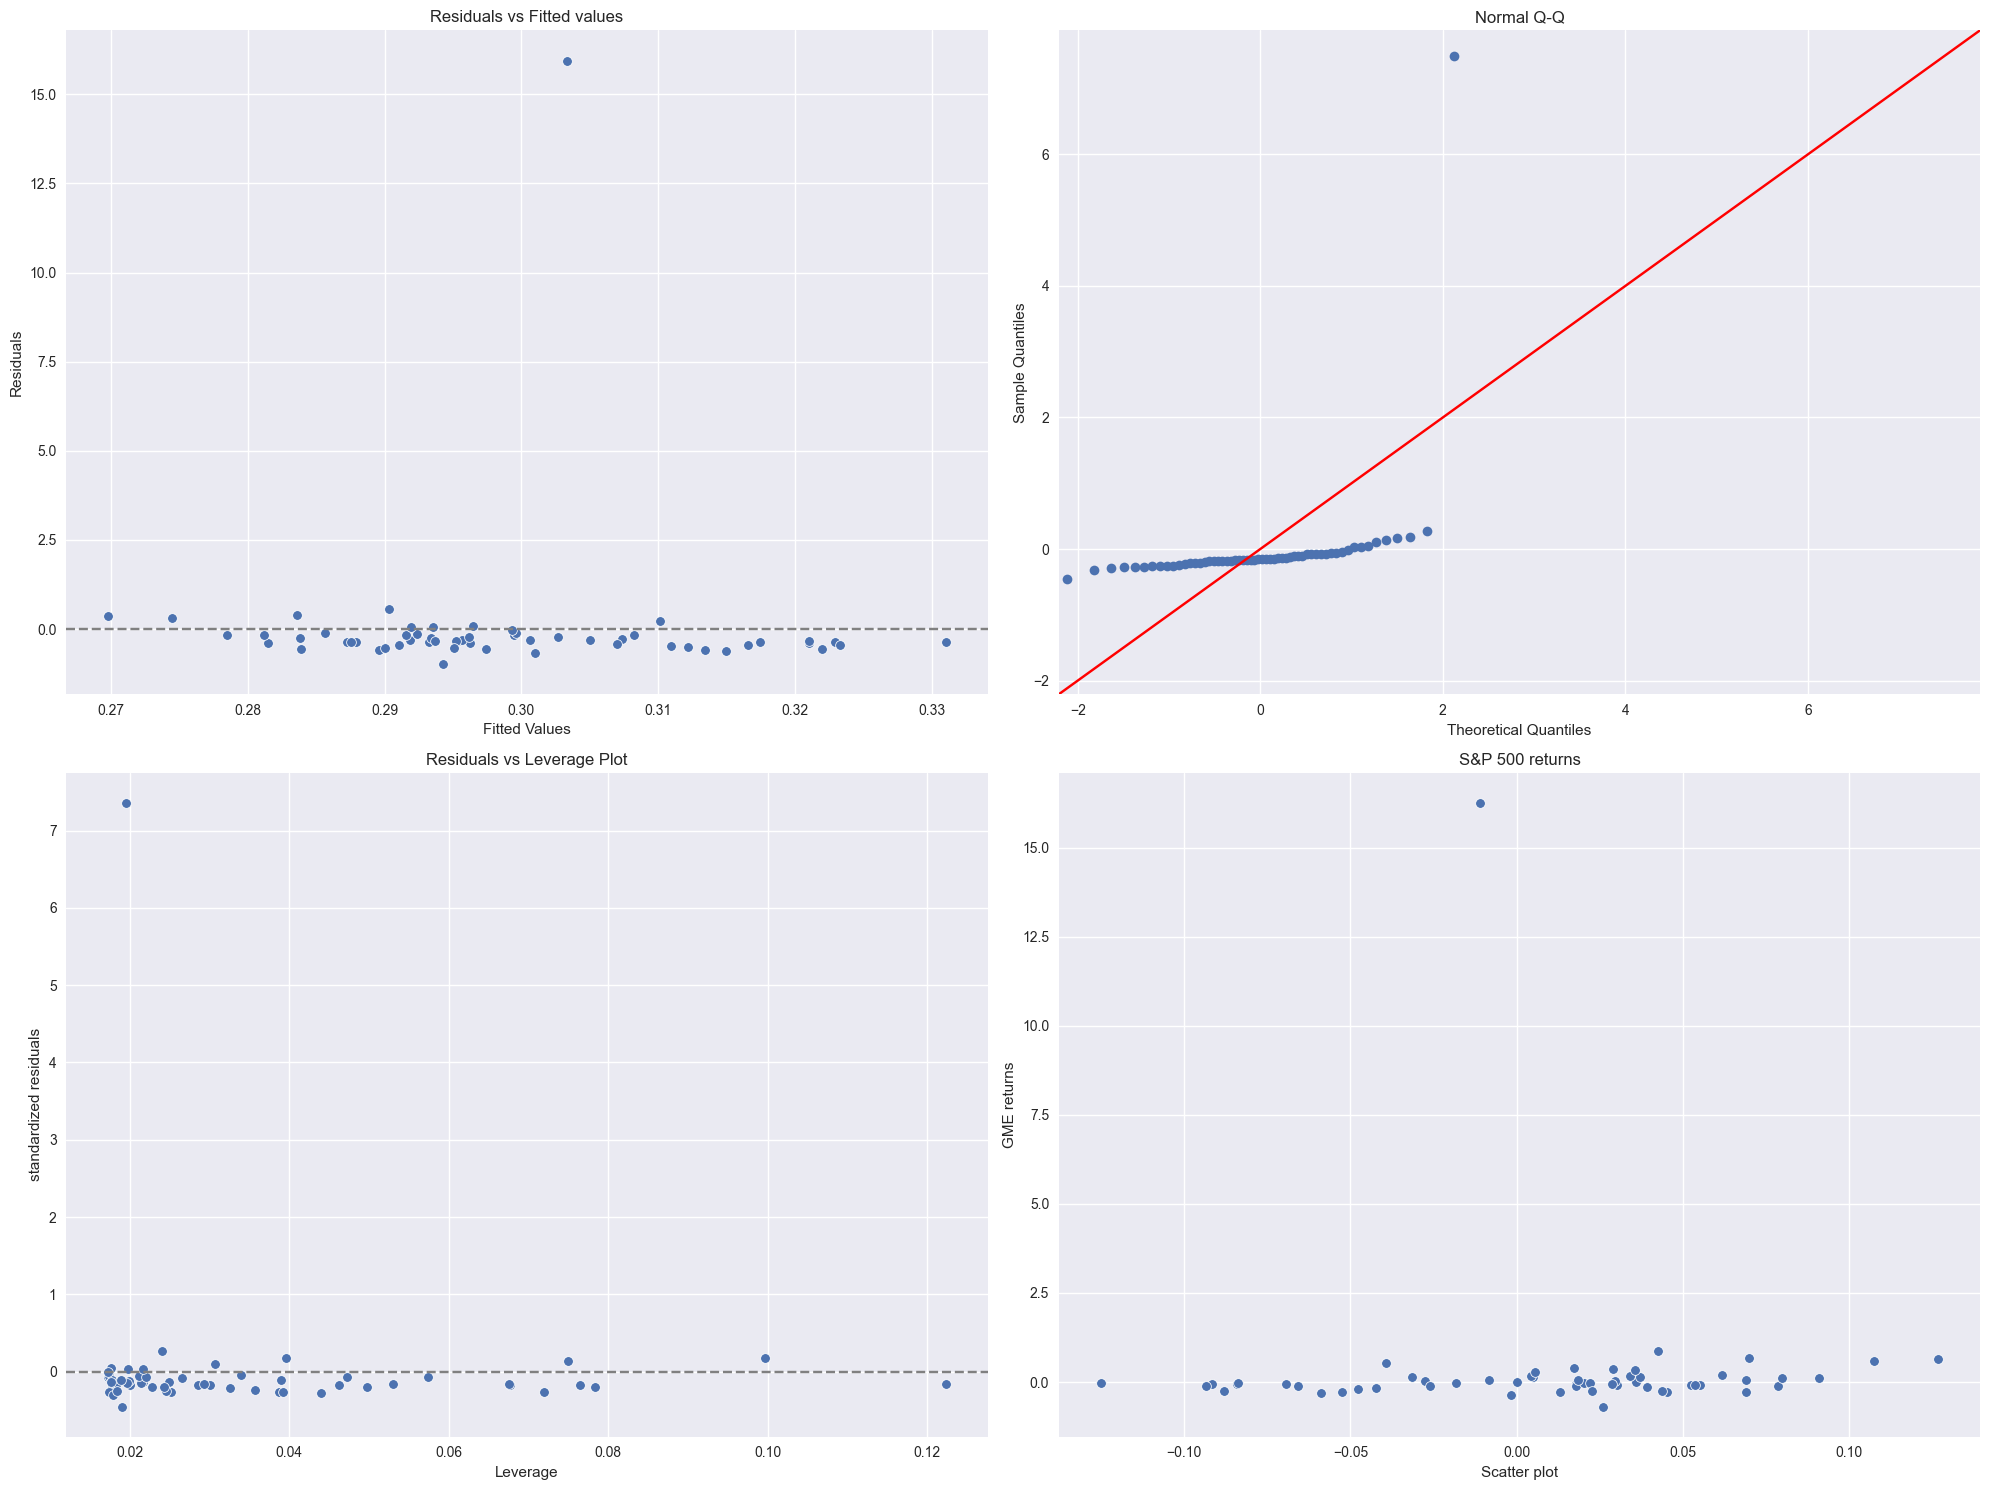

In [50]:
# Get different Variables for diagnostic
residuals = result.resid
fitted_value = result.fittedvalues
stand_resids = result.resid_pearson
influence = result.get_influence()
leverage = influence.hat_matrix_diag
  
# PLot different diagnostic plots
#plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))  
plt.style.use('seaborn')
  
# Residual vs Fitted Plot
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[0, 0])
ax[0, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[0, 0].set_xlabel('Fitted Values')
ax[0, 0].set_ylabel('Residuals')
ax[0, 0].set_title('Residuals vs Fitted values')
  
# Normal Q-Q plot
sm.qqplot(residuals, fit=True, line='45',ax=ax[0, 1], c='#4C72B0')
ax[0, 1].set_title('Normal Q-Q')
  
 
# Residual vs Leverage Plot
sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1, 0])
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 0].set_xlabel('Leverage')
ax[1, 0].set_ylabel('standardized residuals')
ax[1, 0].set_title('Residuals vs Leverage Plot')

# Scatter plot
sns.scatterplot(x=X2, y=Y2, ax=ax[1, 1])
ax[1, 1].set_xlabel('Scatter plot')
ax[1, 1].set_ylabel('GME returns')
ax[1, 1].set_title('S&P 500 returns')
  

plt.tight_layout()
plt.show()

- In the MONTHLY returns, the GME outlier is even MORE obvious!
- The entry corresponds to 2021-01-31 i.e. January 2021!

In [1]:
print(np.count_nonzero(stand_resids >= 7))
np.where(stand_resids >= 7)

NameError: name 'np' is not defined

In [55]:
monthly_return.iloc[-1]

sp    -0.001044
jpm   -0.014117
gme   -0.026933
Name: 2023-04-30 00:00:00, dtype: float64

In [54]:
df1.iloc[-1]

sp     2613.160000
jpm      95.034752
gme       3.016154
Name: 2018-04-09 00:00:00, dtype: float64